## 三大神器概述

### 热身练习

如下列表保存着本公司从2022年1月到12月五个销售区域（南京、无锡、苏州、徐州、南通）的销售额（以百万元为单位），请利用这些数据完成以下操作：

```python
sales_month = [f'{i:>2d}月' for i in range(1, 13)]
sales_area = ['南京', '无锡', '苏州', '徐州', '南通']
sales_data = [
    [32, 17, 12, 20, 28],
    [41, 30, 17, 15, 35],
    [35, 18, 13, 11, 24],
    [12, 42, 44, 21, 34],
    [29, 11, 42, 32, 50],
    [10, 15, 11, 12, 26],
    [16, 28, 48, 22, 28],
    [31, 40, 45, 30, 39],
    [25, 41, 47, 42, 47],
    [47, 21, 13, 49, 48],
    [41, 36, 17, 36, 22],
    [22, 25, 15, 20, 37]
]
```

1. 统计本公司每个月的销售额。
2. 统计本公司销售额的月环比。
3. 统计每个销售区域全年的销售额。
4. 按销售额从高到低排序销售区域及其销售额。
5. 统计全年最高的销售额出现在哪个月哪个区域。
6. 找出哪个销售区域的业绩最不稳定。

In [1]:
sales_month = [f'{i:>2d}月' for i in range(1, 13)]
sales_area = ['南京', '无锡', '苏州', '徐州', '南通']
sales_data = [
    [32, 17, 12, 20, 28],
    [41, 30, 17, 15, 35],
    [35, 18, 13, 11, 24],
    [12, 42, 44, 21, 34],
    [29, 11, 42, 32, 50],
    [10, 15, 11, 12, 26],
    [16, 28, 48, 22, 28],
    [31, 40, 45, 30, 39],
    [25, 41, 47, 42, 47],
    [47, 21, 13, 49, 48],
    [41, 36, 17, 36, 22],
    [22, 25, 15, 20, 37]
]

In [2]:
# 魔法指令 - %whos - 查看变量
%whos

Variable      Type    Data/Info
-------------------------------
sales_area    list    n=5
sales_data    list    n=12
sales_month   list    n=12


In [3]:
print = 100
# TypeError: 'int' object is not callable
# print('hello')

In [4]:
# 魔法指令 - %xdel - 删除变量
%xdel print

In [5]:
# 1. 统计本公司每个月的销售额。
monthly_sales = []
for i, month in enumerate(sales_month):
    monthly_sales.append(sum(sales_data[i]))
    print(f'{month}销售额: {monthly_sales[i]}百万')

 1月销售额: 109百万
 2月销售额: 138百万
 3月销售额: 101百万
 4月销售额: 153百万
 5月销售额: 164百万
 6月销售额: 74百万
 7月销售额: 142百万
 8月销售额: 185百万
 9月销售额: 202百万
10月销售额: 178百万
11月销售额: 152百万
12月销售额: 119百万


In [6]:
# 2. 统计本公司销售额的月环比。
for i in range(1, len(monthly_sales)):
    temp = (monthly_sales[i] - monthly_sales[i - 1]) / monthly_sales[i - 1]
    print(f'{sales_month[i]}: {temp:.2%}')

 2月: 26.61%
 3月: -26.81%
 4月: 51.49%
 5月: 7.19%
 6月: -54.88%
 7月: 91.89%
 8月: 30.28%
 9月: 9.19%
10月: -11.88%
11月: -14.61%
12月: -21.71%


In [7]:
# 3. 统计每个销售区域全年的销售额。
arealy_sales = {}
for j, area in enumerate(sales_area):
    temp = [sales_data[i][j] for i in range(len(sales_month))]
    arealy_sales[area] = sum(temp)
    print(f'{area}: {arealy_sales[area]}')

南京: 341
无锡: 324
苏州: 324
徐州: 310
南通: 418


In [8]:
# 4. 按销售额从高到低排序销售区域及其销售额。
sorted_keys = sorted(arealy_sales, key=lambda x: arealy_sales[x], reverse=True)
for key in sorted_keys:
    print(f'{key}: {arealy_sales[key]}')

南通: 418
南京: 341
无锡: 324
苏州: 324
徐州: 310


In [9]:
# 5. 统计全年最高的销售额出现在哪个月哪个区域。
max_value = sales_data[0][0]
max_i, max_j = 0, 0
for i in range(len(sales_month)):
    for j in range(len(sales_area)):
        temp = sales_data[i][j]
        if temp > max_value:
            max_value = temp
            max_i, max_j = i, j
print(sales_month[max_i], sales_area[max_j])

 5月 南通


总体方差：
$$
\sigma^{2} = \frac{1}{N} \sum_{i=1}^{N}(x_{i} - \mu)^{2}
$$

样本方差：
$$
s^{2} = \frac{1}{n - 1} \sum_{i=1}^{n}(x_{i} - \bar{x})^{2}
$$

In [10]:
# 6. 找出哪个销售区域的业绩最不稳定。
import statistics as stats

arealy_vars = []
for j, area in enumerate(sales_area):
    temp = [sales_data[i][j] for i in range(len(sales_month))]
    arealy_vars.append(stats.pvariance(temp))
sales_area[arealy_vars.index(max(arealy_vars))]

'苏州'

### 三大神器

1. numpy - Numerical Python - 核心是`ndarray`类型，可以用来表示N维数组，提供了一系列处理数据的运算、函数和方法。
2. pandas - Panel Data Set - 封装了和数据分析（加载、重塑、清洗、预处理、透视、呈现）相关的类型、函数和诸多的方法，为数据分析提供了一站式解决方案。它的核心有三个数据类型，分别是：`Series`、`DataFrame`、`Index`。
3. matplotlib - 封装了各种常用的统计图表，帮助我们实现数据呈现。
4. scipy - Scientific Python - 针对NumPy进行了很好的补充，提供了高级的数据运算的函数和方法。
5. scikit-learn - 封装了常用的机器学习（分类、聚类、回归等）算法，除此之外，还提供了数据预处理、特征工程、模型验证相关的函数和方法。
6. sympy - Symbolic Python - 封装了符号运算相关操作。

In [11]:
# 魔法指令 - %pip - 调用包管理工具pip
# %pip install numpy pandas matplotlib openpyxl

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [13]:
np.__version__

'1.26.4'

In [14]:
pd.__version__

'2.2.3'

In [15]:
# 将嵌套列表处理成二维数组
data = np.array(sales_data)
data

array([[32, 17, 12, 20, 28],
       [41, 30, 17, 15, 35],
       [35, 18, 13, 11, 24],
       [12, 42, 44, 21, 34],
       [29, 11, 42, 32, 50],
       [10, 15, 11, 12, 26],
       [16, 28, 48, 22, 28],
       [31, 40, 45, 30, 39],
       [25, 41, 47, 42, 47],
       [47, 21, 13, 49, 48],
       [41, 36, 17, 36, 22],
       [22, 25, 15, 20, 37]])

In [16]:
# 沿着1轴求和（每个月的销售额）
data.sum(axis=1)

array([109, 138, 101, 153, 164,  74, 142, 185, 202, 178, 152, 119])

In [17]:
# 沿着0轴求和（每个区域的销售）
data.sum(axis=0)

array([341, 324, 324, 310, 418])

In [18]:
# 总体方差
data.var(axis=0).round(1)

array([128.4, 108.5, 241.3, 132.6,  85.6])

In [19]:
# 样本方差
data.var(axis=0, ddof=1).round(1)

array([140.1, 118.4, 263.3, 144.7,  93.4])

In [20]:
# 构造DataFrame对象（处理二维数据）
df = pd.DataFrame(data, columns=sales_area, index=sales_month)
df

,南京,无锡,苏州,徐州,南通
1月,32,17,12,20,28
2月,41,30,17,15,35
3月,35,18,13,11,24
4月,12,42,44,21,34
5月,29,11,42,32,50
6月,10,15,11,12,26
7月,16,28,48,22,28
8月,31,40,45,30,39
9月,25,41,47,42,47
10月,47,21,13,49,48


In [21]:
# 求和（默认沿着0轴）
df.sum()

南京    341
无锡    324
苏州    324
徐州    310
南通    418
dtype: int64

In [22]:
# 排序
df.sum().sort_values(ascending=False)

南通    418
南京    341
无锡    324
苏州    324
徐州    310
dtype: int64

In [23]:
# 求和（指定沿着1轴）
df.sum(axis=1)

 1月    109
 2月    138
 3月    101
 4月    153
 5月    164
 6月     74
 7月    142
 8月    185
 9月    202
10月    178
11月    152
12月    119
dtype: int64

In [24]:
# 计算月环比
df.sum(axis=1).pct_change()

 1月         NaN
 2月    0.266055
 3月   -0.268116
 4月    0.514851
 5月    0.071895
 6月   -0.548780
 7月    0.918919
 8月    0.302817
 9月    0.091892
10月   -0.118812
11月   -0.146067
12月   -0.217105
dtype: float64

In [25]:
df['合计'] = df.sum(axis=1)
df['月环比'] = df['合计'].pct_change()
df

,南京,无锡,苏州,徐州,南通,合计,月环比
1月,32,17,12,20,28,109,NaN
2月,41,30,17,15,35,138,0.266055
3月,35,18,13,11,24,101,-0.268116
4月,12,42,44,21,34,153,0.514851
5月,29,11,42,32,50,164,0.071895
6月,10,15,11,12,26,74,-0.548780
7月,16,28,48,22,28,142,0.918919
8月,31,40,45,30,39,185,0.302817
9月,25,41,47,42,47,202,0.091892
10月,47,21,13,49,48,178,-0.118812


In [26]:
# 渲染DataFrame
df.style.format(
    formatter={'月环比': '{:.2%}'},
    na_rep='------'
).bar(
    subset='合计'
).background_gradient(
    'RdYlBu', subset='月环比'
)

,南京,无锡,苏州,徐州,南通,合计,月环比
1月,32,17,12,20,28,109,------
2月,41,30,17,15,35,138,26.61%
3月,35,18,13,11,24,101,-26.81%
4月,12,42,44,21,34,153,51.49%
5月,29,11,42,32,50,164,7.19%
6月,10,15,11,12,26,74,-54.88%
7月,16,28,48,22,28,142,91.89%
8月,31,40,45,30,39,185,30.28%
9月,25,41,47,42,47,202,9.19%
10月,47,21,13,49,48,178,-11.88%


In [27]:
# 将DataFrame输出到Excel文件
df.to_excel('sales.xlsx', sheet_name='data')

In [28]:
# 魔法指令 - %config - 修改配置
# %config InlineBackend.figure_format = 'svg'
get_ipython().run_line_magic('config', 'InlineBackend.figure_format = "svg"')

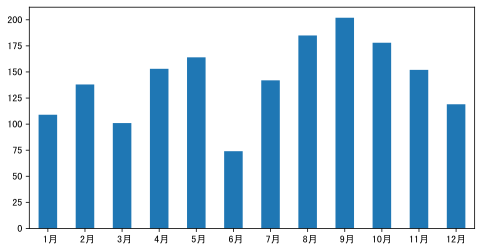

In [29]:
# 绘制柱状图
plt.figure(figsize=(8, 4), dpi=200)
df.plot(ax=plt.gca(), kind='bar', y='合计', legend=False)
plt.xticks(rotation=0)
plt.savefig('aa.png')
plt.show()

### 魔法指令

In [ ]:
# 查看当前工作路径 - print working directory
%pwd

In [ ]:
# 查看指定路径文件列表 - list directory contents
%ls

In [ ]:
# 执行系统命令
%system date

In [ ]:
# 保存运行过的代码
%save temp.py

In [ ]:
# 加载文件内容到单元格
%load temp.py

In [ ]:
# 统计代码执行时间
%timeit (1, 2, 3, 4, 5)

In [ ]:
# 查看历史输入
%hist

In [ ]:
# 查看魔法指令
%lsmagic

### 获取帮助

In [ ]:
np.random?

In [ ]:
np.random.normal?

In [ ]:
np.random.r*?